In [1]:
import os
from symfit import variables, Parameter, Model, Fit, exp
from symfit.contrib.interactive_guess import InteractiveGuess2D
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [2]:
os.chdir(r'D:\SurfDrive\backup_for_surfacePro\Work\C3H3+\Data\datas\full_report_felixFiles\linear_depletion_scan')
file = 'depletion_linear.txt'

t, inten = np.genfromtxt(file).T
n = 10
E = 3.3/1000
inten_off = [4.4, 4.2, 4]

trap_time = n*t*E
rel_inten = 1-inten/inten_off

x, y = variables('x, y')
A = Parameter('A')
k = Parameter('k')

model = Model({
    y: A*(1-exp(-k*x))
})

In [22]:
class depletion_model:

    def __init__(self):
        
        width = widgets.IntSlider(min=5,max=20,step=1,value=10)
        height = widgets.IntSlider(min=2,max=10,step=1,value=5)
        dpi = widgets.IntSlider(min=70,max=200,step=1,value=100)

        xlabel = widgets.Text('n*t*E')
        ylabel = widgets.Text('Relative abundance of active isomer')
        title = widgets.Text('Depletion Model')

        accordion_figure = widgets.Accordion(children=[
            widgets.HBox([ widgets.Label(value="Width"), width, widgets.Label(value="Height"), height, widgets.Label(value="DPI"), dpi]),
            widgets.HBox([widgets.Label(value="X-label "), xlabel, widgets.Label(value="Y-Label "), ylabel, widgets.Label(value="Title "), title])
                                               ])
        accordion_figure.set_title(0, 'Size:')
        accordion_figure.set_title(1, 'Labels')

        a = widgets.FloatSlider(min=0,max=1,step=0.1,value=0.2, desciption='A')
        K = widgets.FloatSlider(min=0,max=50,step=0.1,value=5)

        accordion_params = widgets.Accordion(children=[widgets.HBox([widgets.Label(value="A"), a, widgets.Label(value="k"), K])])
        accordion_params.set_title(0, 'Main Parameters:')

        tab_nest = widgets.Tab()
        tab_nest.children = [accordion_params, accordion_figure]
        tab_nest.set_title(0, 'Parameters')
        tab_nest.set_title(1, 'Figure Properties')
        
        self.save_name = widgets.Text('Depletion_Plot')
        save_button = widgets.Button(
            description='Save',
            layout={'width': '300px'}
        )
        
        save_button.on_click(self.save_plot)
        self.print_save = widgets.Label(value = '')
        
        save_layout = widgets.VBox([self.save_name, save_button, self.print_save])
        
        last_layout = widgets.HBox([save_layout, widgets.Label(value = f'Location: {os.getcwd()}')])
        self.out = widgets.interactive_output(self.plot, {'a': a, 'K': K, 'width': width, 'height': height, 'dpi': dpi, 'xlabel': xlabel, 'ylabel': ylabel, 'title': title})
        display(tab_nest, self.out, last_layout)
        
    def plot(self, a, K, width, height, dpi, xlabel, ylabel, title):

        xdata = np.linspace(0, 0.5, 10)
        y = model(x=xdata, A=a, k=K)
        self.fig, ax = plt.subplots(figsize = (width, height), dpi=dpi)
        ax.plot(trap_time, rel_inten, '.', label='Exp')
        ax.plot(xdata, y[0], label=f'fit: A:{a}, k:{K}')

        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_title(title)
        ax.legend()
        ax.grid()
        
    def save_plot(self, event):
        self.fig.savefig(f'./{self.save_name.value}.png')
        
        self.print_save.value='Saved'
        
app = depletion_model()

Output()

In [28]:
import datetime
datetime.datetime.now()

datetime.datetime(2019, 4, 25, 15, 44, 18, 938568)

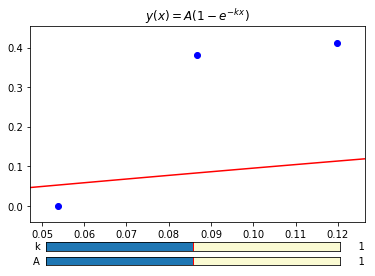

In [32]:
guess = InteractiveGuess2D(model, x=trap_time, y=rel_inten)
#guess_results = guess.execute()

In [85]:
fit = Fit(model, x=trap_time, y=rel_inten)
fit_result = fit.execute()
print(trap_time, fit_result)

[0.05379 0.08679 0.11979] 
Parameter Value        Standard Deviation
A         1.456439e+03 2.142451e+07
k         2.285476e-03 3.362373e+01
Fitting status message: Maximum number of iterations has been exceeded.
Number of iterations:   640
Regression Coefficient: 0.613705514843294



In [83]:
fit.initial_guesses

array([1., 1.])